In [1]:
texts = [
    "I love machine learning.",
    "Deep learning models are powerful.",
    "Natural language processing is fascinating."
]


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_embeddings = tfidf.fit_transform(texts).toarray()


In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("stoicstatic/word2vecslim300k")

print("Path to dataset files:", path)

/Users/manish shrestha/Desktop/Gen_AI_Training_Projects/projenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/manish shrestha/.cache/kagglehub/datasets/stoicstatic/word2vecslim300k/versions/1


In [9]:
import os

print("Downloaded to:", path)
print("Contents:")
print(os.listdir(path))


Downloaded to: /Users/manish shrestha/.cache/kagglehub/datasets/stoicstatic/word2vecslim300k/versions/1
Contents:
['GoogleNews-vectors-negative300-SLIM.bin']


In [11]:
from gensim.models import KeyedVectors
import os
import numpy as np
model_path = os.path.join(path, "GoogleNews-vectors-negative300-SLIM.bin")
w2v = KeyedVectors.load_word2vec_format(model_path, binary=True)

def get_w2v_embedding(text):
    words = text.lower().split()
    word_vecs = [w2v[word] for word in words if word in w2v]
    if len(word_vecs) == 0:
        return np.zeros(w2v.vector_size)
    return np.mean(word_vecs, axis=0)

w2v_embeddings = np.array([get_w2v_embedding(t) for t in texts])


In [ ]:
import ipywidgets.widgets as widgets  # type: ignore
from IPython.display import display

# from huggingface_hub import login

# login() here login to the huggingface before using the model # Replace with your real token


rm: /Users/manish shrestha/.huggingface/token: No such file or directory


In [33]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')
embedding = model.encode(texts)

In [34]:
from sklearn.metrics.pairwise import cosine_similarity

cos_sim_tfidf = cosine_similarity(tfidf_embeddings)
cos_sim_w2v = cosine_similarity(w2v_embeddings)
cos_sim_bert = cosine_similarity(embedding)

print("TF-IDF similarity matrix:\n", cos_sim_tfidf)
print("Word2Vec similarity matrix:\n", cos_sim_w2v)
print("BERT similarity matrix:\n", cos_sim_bert)


TF-IDF similarity matrix:
 [[1.         0.16834334 0.        ]
 [0.16834334 1.         0.        ]
 [0.         0.         1.        ]]
Word2Vec similarity matrix:
 [[0.9999996  0.24540518 0.2422194 ]
 [0.24540518 0.99999976 0.3925678 ]
 [0.2422194  0.3925678  0.99999994]]
BERT similarity matrix:
 [[1.         0.60452497 0.55989474]
 [0.60452497 0.99999976 0.44697726]
 [0.55989474 0.44697726 0.9999998 ]]


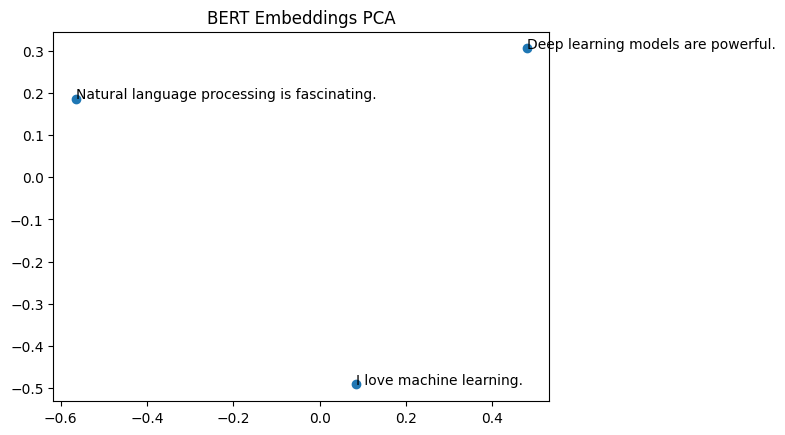

In [35]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced = pca.fit_transform(embedding)

plt.scatter(reduced[:,0], reduced[:,1])
for i, txt in enumerate(texts):
    plt.annotate(txt, (reduced[i,0], reduced[i,1]))
plt.title("BERT Embeddings PCA")
plt.show()


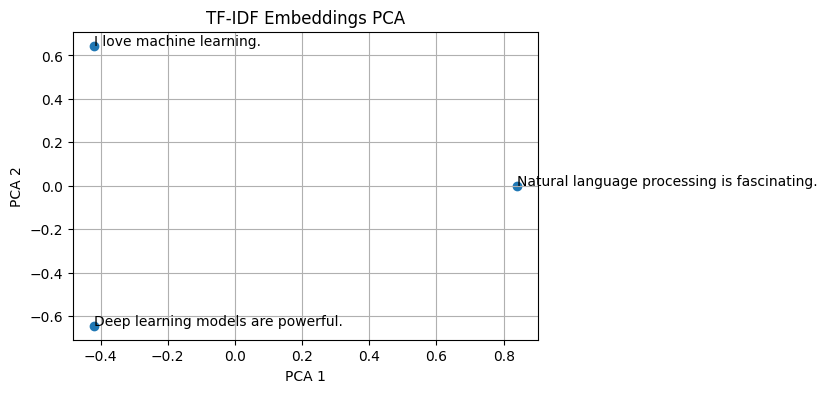

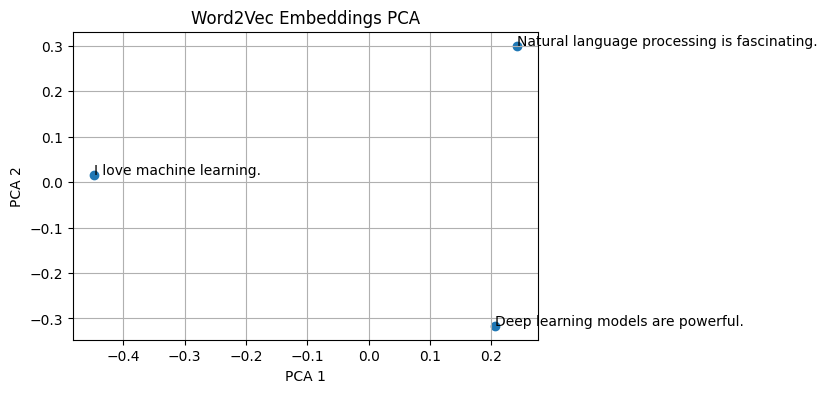

In [37]:
def plot_pca(embeddings, title):
    reduced = PCA(n_components=2).fit_transform(embeddings)
    plt.figure(figsize=(6, 4))
    plt.scatter(reduced[:, 0], reduced[:, 1])
    for i, txt in enumerate(texts):
        plt.annotate(txt, (reduced[i, 0], reduced[i, 1]))
    plt.title(title)
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.grid(True)
    plt.show()
plot_pca(tfidf_embeddings, "TF-IDF Embeddings PCA")
plot_pca(w2v_embeddings, "Word2Vec Embeddings PCA")